In [21]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats



import seaborn as sns
import statsmodels.api as sm
import pandas as pd



from scipy.stats import shapiro,normaltest,kstest,jarque_bera

import numpy as np
import scipy.stats as stats
import pingouin as pg


In [38]:
def count_norm(df_counta):
    df_count=df_counta.copy()
    tampung_itu=[]
    for j in range(len(df_count)):
        tampun_ini=[]
        ini_inc=1
        for i in range(1,5):
            #print(j,i)
            
            ini=df_count[df_count.columns[i]].iloc[j]
            if ini=='True':
                tampun_ini.append(ini_inc)
                ini_inc=ini_inc+1
            else:
                tampun_ini.append(0)
                
        tampung_itu.append(np.max(tampun_ini))
        
    #print(tampung_itu)
                
            
        
    df_count['banyak']=tampung_itu
    #print(df_count)
    return  df_count
            
def ubah_notasi_ilmiah(value):
    formatted_value = "{:.4f}".format(value) if isinstance(value, float) else value
    return formatted_value
    


def data_normal(data,dftt,ii,p_valls):
    statshapiro, p_valueshapiro = shapiro(data)
    statnormaltest, p_valuenormaltest = normaltest(data)
    statkstes, p_valuekstes = kstest(data, 'norm')
    sta_jb,p_jb =jarque_bera(data)


    sh=  str(p_valueshapiro>p_valls)
    norm=str(p_valuenormaltest>p_valls)
    kst=str(p_valuekstes>p_valls)
    Pjb=str(p_jb>p_valls)




    sshapiro='shapiro'
    snormaltes='normaltes'
    skstest='kstest'
    spjb='jarque_bera'


    enter='\n'
    Statisticw= 'Statistic'
    P_valuew='P-valuew'
    nor='normal: '
    samadengan=' : '
    jeda='   '


    statshapiro=ubah_notasi_ilmiah(statshapiro)
    p_valueshapiro=ubah_notasi_ilmiah(p_valueshapiro)
    statnormaltest=ubah_notasi_ilmiah(statnormaltest)
    p_valuenormaltest =ubah_notasi_ilmiah( p_valuenormaltest )
    statkstes=ubah_notasi_ilmiah(statkstes)
    p_valuekstes=ubah_notasi_ilmiah(p_valuekstes)
    sta_jb=ubah_notasi_ilmiah(sta_jb)
    p_jb=ubah_notasi_ilmiah(p_jb)

    midd=sshapiro+jeda+nor+sh+enter+Statisticw+samadengan+statshapiro+jeda+P_valuew+samadengan+p_valueshapiro
    midd1=snormaltes+jeda+nor+ norm+enter+Statisticw+samadengan+ statnormaltest+jeda+P_valuew+samadengan+p_valuenormaltest
    midd2=skstest+jeda+nor+ kst+enter+Statisticw+samadengan+ statkstes+jeda+P_valuew+samadengan+ p_valuekstes
    midd3=spjb+jeda+nor+ Pjb+enter+Statisticw+samadengan+ sta_jb+jeda+P_valuew+samadengan+ p_jb



    f=dftt.columns[ii]
    rang=[f,sh,statshapiro,p_valueshapiro, norm,statnormaltest,p_valuenormaltest  ,kst,statkstes,p_valuekstes,Pjb,sta_jb,p_jb]


    return midd,midd1,midd2,midd3,rang






# Mengasumsikan df adalah DataFrame Anda dan seaborn serta statsmodels diimpor
def visual_norm(dft, show_plot,p_vall, dpi):


    panjang = len(dft.columns)
    if panjang==1:
        dft=dft['salinan']=dft
        panjang=2


    if show_plot==True:
        # CATATAN! Ini mengembalikan array 2 dimensi dari subplot
        fig, axes = plt.subplots(nrows=panjang, ncols=3, figsize=(30, panjang * 10), dpi= dpi)
        #fig.text(0.5, 0.95, 'analisis distribusi normal', ha='center', va='center', fontsize=60, color='black')
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.8)

        axes[0, 0].text(-.4, 1.5,'o', ha='center', va='center', transform=axes[0, 0].transAxes, fontsize=1,
                                color='blue')
        axes[panjang-1, 2].text(1.3, -.4,'o', ha='center', va='center', transform=axes[panjang-1, 2].transAxes, fontsize=1,
                                color='blue')
    rangkuman = []
    for i in range(panjang):
        data = dft[dft.columns[i]]
        data_hasil = data_normal(data, dft, i,p_vall)
        rangkuman.append(data_hasil[4])

        # visualisasi
        if show_plot==True:
            
      


            # Boxplot
            sns.boxplot(x=data, ax=axes[i, 0])
            axes[i, 0].tick_params(axis='x', labelsize=25)
            axes[i, 0].tick_params(axis='y', labelsize=25)
            axes[i, 0].set_xlabel(dft.columns[i], fontsize=30)
             # Atur ukuran xtick

            # Q-Q plot
            sm.qqplot(data, line='s', ax=axes[i, 1])
            axes[i, 1].tick_params(axis='x', labelsize=25)
            axes[i, 1].tick_params(axis='y', labelsize=25) 
            axes[i, 1].set_xlabel('Theoretical Quantiles', fontsize=30)
            axes[i, 1].set_ylabel('Sample Quantiles', fontsize=30)  # Atur ukuran xtick

            # Histogram
            sns.histplot(data, kde=True, ax=axes[i, 2])
            axes[i, 2].tick_params(axis='x', labelsize=25)
            axes[i, 2].tick_params(axis='y', labelsize=25)
            axes[i, 2].set_xlabel(dft.columns[i], fontsize=30)
            axes[i, 2].set_ylabel('Count', fontsize=30) 



            # Add text annotation for the third subplot left
            
            axes[i, 0].text(0.5, 1.12, data_hasil[2], ha='center', va='center', transform=axes[i, 0].transAxes, fontsize=25,
                            color='blue')
            axes[i, 0].text(0.5, 1.23, '-------------------------------------------------------------------', ha='center', va='center', transform=axes[i, 0].transAxes, fontsize=20,
                            color='red')
            axes[i, 0].text(0.5, 1.33, data_hasil[0],
                           ha='center', va='center', transform=axes[i, 0].transAxes, fontsize=25,
                           color='blue')

            # Add text annotation for the third subplot mid
            axes[i, 1].text(0.5, 1.23, dft.columns[i], ha='center', va='center', transform=axes[i, 1].transAxes, fontsize=80,
                            color='red')






            # Add text annotation for the third subplot right
            axes[i, 2].text(0.5, 1.33, data_hasil[1], ha='center', va='center', transform=axes[i, 2].transAxes, fontsize=25,
                            color='blue')
            axes[i, 2].text(0.5, 1.12, data_hasil[3], ha='center', va='center', transform=axes[i, 2].transAxes, fontsize=25,
                            color='blue')
            axes[i, 2].text(0.5, 1.23, '-------------------------------------------------------------------', ha='center', va='center', transform=axes[i, 2].transAxes, fontsize=20,
                            color='red')


    hh = pd.DataFrame(rangkuman)
    hh.applymap(ubah_notasi_ilmiah)
    hh.columns = ['Columns', 'Shapiro','Stat_shapiro','P_value_shapiro', 'Normaltes', 'Stat_Normaltes','P_value_Normaltes',
                  'Kstest','Stat_Kstest','P_value_Kstest','Jarque_bera','Stat_Jarque_bera','P_value_Jarque_bera']



    
    df_count=count_norm(hh[['Columns','Shapiro','Normaltes','Kstest','Jarque_bera']])     
    yang_dipakai=df_count[df_count['banyak']>1]['Columns']
    

    if show_plot==True:
      return hh, fig, axes,df_count,yang_dipakai

    else:
      return hh,0,0,df_count,yang_dipakai





In [39]:
df=pd.read_csv('hearing_test.csv')
df_analisa=df.drop(columns=['test_result'])
df_analisa

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [45]:
table, fig, axes,df_count,yang_dipakai=visual_norm(df_analisa,False,0.05, 50)

In [46]:
table

,Columns,Shapiro,Stat_shapiro,P_value_shapiro,Normaltes,Stat_Normaltes,P_value_Normaltes,Kstest,Stat_Kstest,P_value_Kstest,Jarque_bera,Stat_Jarque_bera,P_value_Jarque_bera
0,age,False,0.9932,0.0000,False,80.3725,0.0000,False,1.0000,0.0000,False,67.8474,0.0000
1,physical_score,False,0.9319,0.0000,False,411.9858,0.0000,False,0.9996,0.0000,False,514.3785,0.0000


In [48]:
df_count

,Columns,Shapiro,Normaltes,Kstest,Jarque_bera,banyak
0,age,False,False,False,False,0
1,physical_score,False,False,False,False,0


In [49]:
yang_dipakai

Series([], Name: Columns, dtype: object)

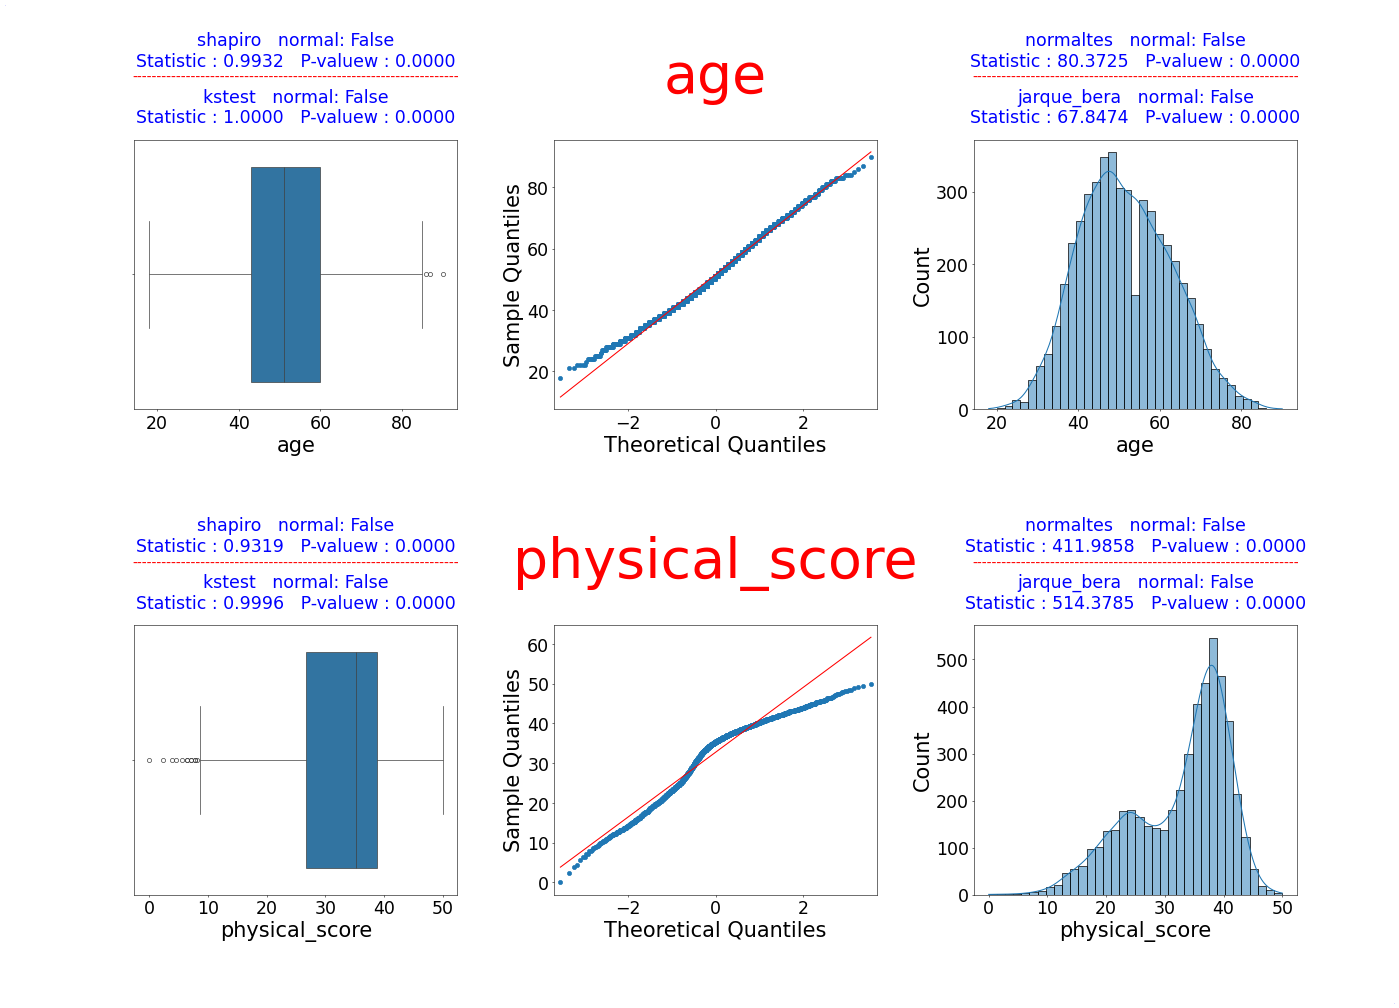

In [52]:
table, fig, axes,df_count,yang_dipakai=visual_norm(df_analisa,True,0.05, 50)

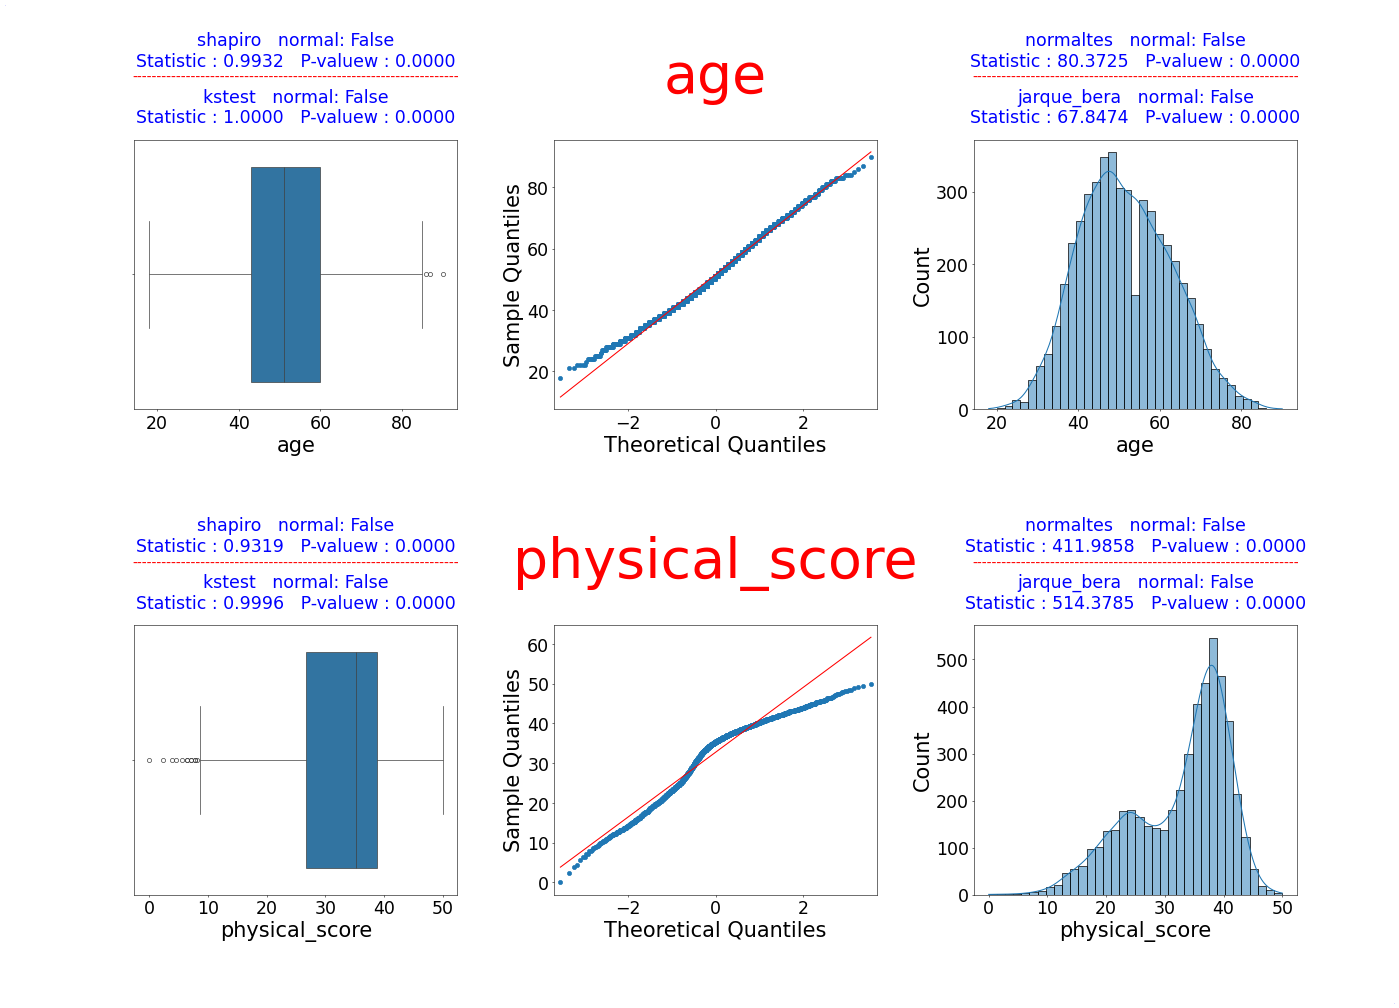

In [53]:
fig